In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [26]:
df_drugLib_train=pd.read_csv('.venv/drugLibTrain_raw.csv')
df_drugLib_test=pd.read_csv('.venv/drugLibTest_raw.csv')

In [27]:
df_drugLib_train.head()
df_drugLib_train.shape

(3107, 9)

In [28]:
df_drugLib_test.head()
df_drugLib_test.shape

(1036, 9)

In [29]:
df_druglib = pd.concat([df_drugLib_train,df_drugLib_test])
df_druglib.shape

(4143, 9)

In [30]:
df_druglib.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [31]:
df_druglib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4143 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4143 non-null   int64 
 1   urlDrugName        4143 non-null   object
 2   rating             4143 non-null   int64 
 3   effectiveness      4143 non-null   object
 4   sideEffects        4143 non-null   object
 5   condition          4142 non-null   object
 6   benefitsReview     4120 non-null   object
 7   sideEffectsReview  4045 non-null   object
 8   commentsReview     4130 non-null   object
dtypes: int64(2), object(7)
memory usage: 323.7+ KB


In [32]:
df_druglib.isnull().sum()

Unnamed: 0            0
urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             1
benefitsReview       23
sideEffectsReview    98
commentsReview       13
dtype: int64

In [33]:
df_druglib=df_druglib.dropna()
df_druglib.isnull().sum()
df_druglib.shape

(4013, 9)

In [34]:
df_druglib

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
1031,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [35]:
df_druglib['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [36]:
df_druglib['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [37]:
#Mapping Side-Effects and Effectiveness to numerals
# Map effectiveness column into ordinal data
effectiveness_map = {
    'Ineffective': 1,
    'Marginally Effective': 2,
    'Moderately Effective': 3,
    'Considerably Effective': 4,
    'Highly Effective': 5
}

df_druglib['effectiveness_rank'] = df_druglib['effectiveness'].map(effectiveness_map)

In [38]:
# Map sideEffects column into ordinal data
sideEffects_map = {
    'No Side Effects': 1,
    'Mild Side Effects': 2,
    'Moderate Side Effects': 3,
    'Severe Side Effects': 4,
    'Extremely Severe Side Effects': 5
}

df_druglib['sideEffects_rank'] = df_druglib['sideEffects'].map(sideEffects_map)

In [39]:
df_druglib[['effectiveness','effectiveness_rank']].drop_duplicates().sort_values(by='effectiveness_rank')

,effectiveness,effectiveness_rank
5,Ineffective,1
3,Marginally Effective,2
16,Moderately Effective,3
7,Considerably Effective,4
0,Highly Effective,5


In [40]:
df_druglib[['sideEffects','sideEffects_rank']].drop_duplicates().sort_values(by='sideEffects_rank')

,sideEffects,sideEffects_rank
2,No Side Effects,1
0,Mild Side Effects,2
10,Moderate Side Effects,3
1,Severe Side Effects,4
9,Extremely Severe Side Effects,5


In [41]:
df_druglib.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_rank,sideEffects_rank
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",5,2
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",5,4
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,5,1
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,2,2
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,2,4


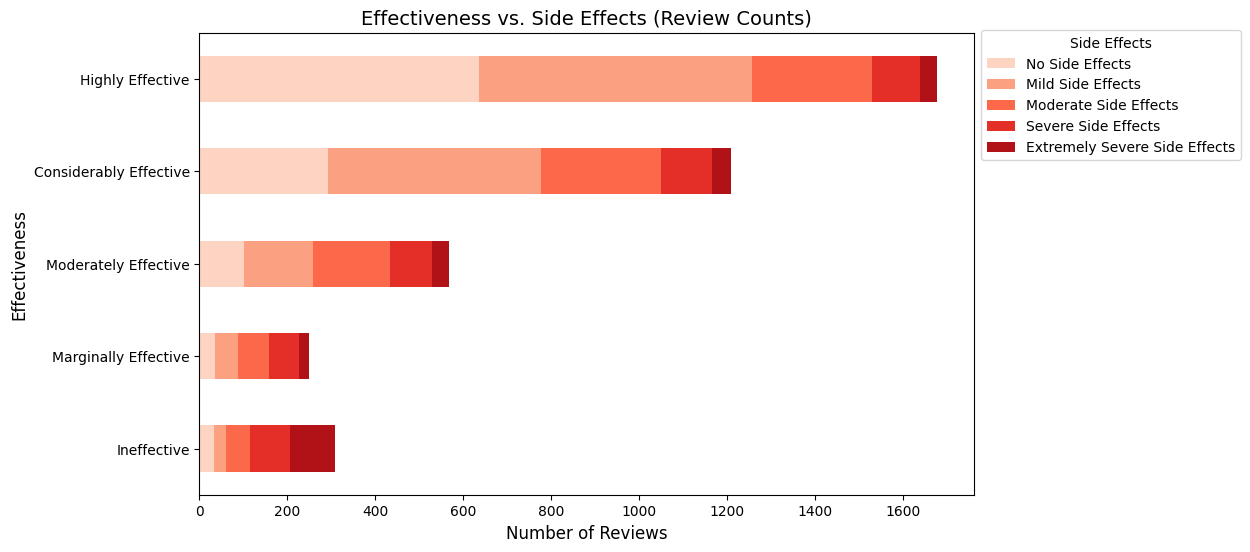

In [42]:
# Plotting horizontal bar chart to show drug's effectiveness and side effects distribution
effectiveness_order = [
    'Ineffective',
    'Marginally Effective',
    'Moderately Effective',
    'Considerably Effective',
    'Highly Effective'
]

sideEffects_order = [
    'No Side Effects',
    'Mild Side Effects',
    'Moderate Side Effects',
    'Severe Side Effects',
    'Extremely Severe Side Effects'
]

sideEffects_color = sns.color_palette("Reds", len(sideEffects_order))
data_bar1 = df_druglib.pivot_table(index='effectiveness',columns='sideEffects',values='commentsReview',aggfunc='count')
data_bar1 = data_bar1.reindex(index=effectiveness_order,columns=sideEffects_order)

ax = data_bar1.plot(kind='barh',stacked=True,color=sideEffects_color,figsize=(10, 6))

plt.title('Effectiveness vs. Side Effects (Review Counts)', fontsize=14)
plt.ylabel('Effectiveness', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=12)

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Side Effects', bbox_to_anchor=(1,1.02), loc='upper left')

plt.show()

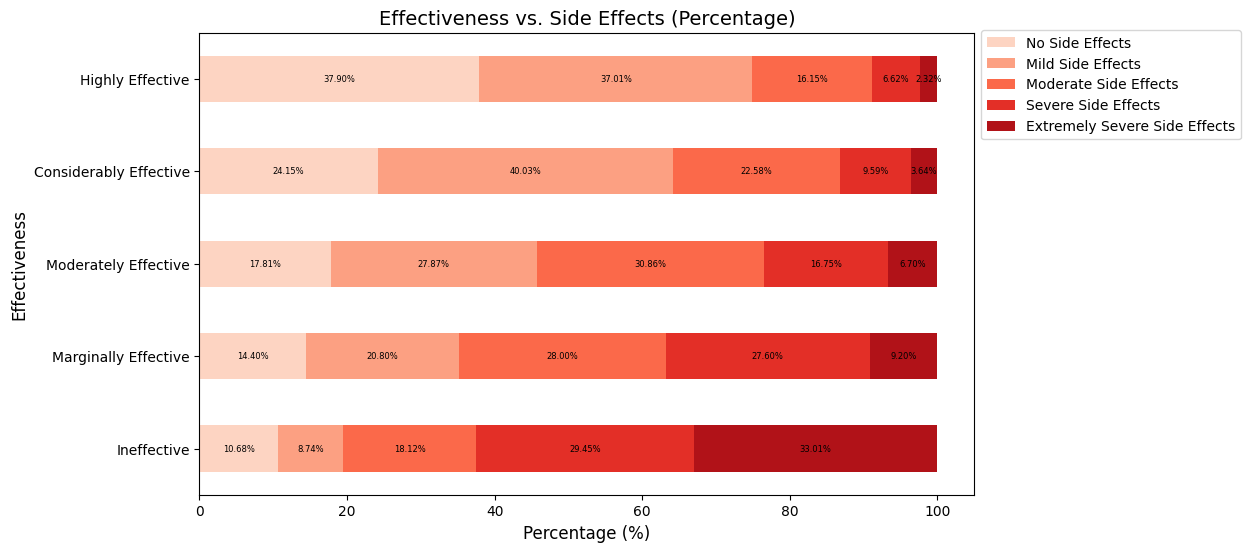

In [43]:
# Calculate row-wise sum for normalization
row_sums = data_bar1.sum(axis=1)

# Calculate percentages
data_percent = data_bar1.div(row_sums, axis=0) * 100

# Plotting
ax = data_percent.plot.barh(stacked=True,color=sideEffects_color,figsize=(10, 6))
plt.title('Effectiveness vs. Side Effects (Percentage)', fontsize=14)
plt.ylabel('Effectiveness', fontsize=12)
plt.xlabel('Percentage (%)', fontsize=12)

for c in ax.containers:

    # customize the label to account for cases when there might not be a bar section
    labels = [f'{w:.2f}%' if (w := v.get_width()) > 0 else '' for v in c ]

    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center', fontsize=6)

ax.legend(bbox_to_anchor=(1,1.02), loc='upper left')

plt.show()

In [44]:
data_bar1

sideEffects,No Side Effects,Mild Side Effects,Moderate Side Effects,Severe Side Effects,Extremely Severe Side Effects
effectiveness,,,,,
Ineffective,33,27,56,91,102
Marginally Effective,36,52,70,69,23
Moderately Effective,101,158,175,95,38
Considerably Effective,292,484,273,116,44
Highly Effective,636,621,271,111,39


In [45]:
data_percent

sideEffects,No Side Effects,Mild Side Effects,Moderate Side Effects,Severe Side Effects,Extremely Severe Side Effects
effectiveness,,,,,
Ineffective,10.679612,8.737864,18.122977,29.449838,33.009709
Marginally Effective,14.400000,20.800000,28.000000,27.600000,9.200000
Moderately Effective,17.813051,27.865961,30.864198,16.754850,6.701940
Considerably Effective,24.152192,40.033085,22.580645,9.594706,3.639371
Highly Effective,37.902265,37.008343,16.150179,6.615018,2.324195


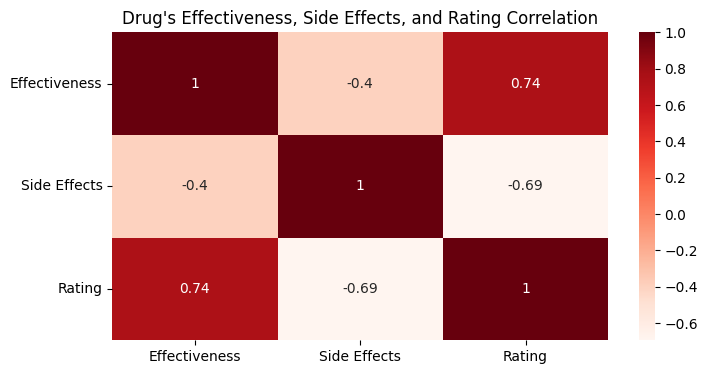

In [46]:
# Plot heatmap
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(df_druglib[['effectiveness_rank','sideEffects_rank','rating']].corr(), annot=True, cmap='Reds', cbar=True)

# Custom x and y labels
x_labels = ['Effectiveness', 'Side Effects', 'Rating']
y_labels = ['Effectiveness', 'Side Effects', 'Rating']

# Set the x and y labels
heatmap.set_xticklabels(x_labels, rotation=0)
heatmap.set_yticklabels(y_labels, rotation=0)

plt.title("Drug's Effectiveness, Side Effects, and Rating Correlation")

plt.show()

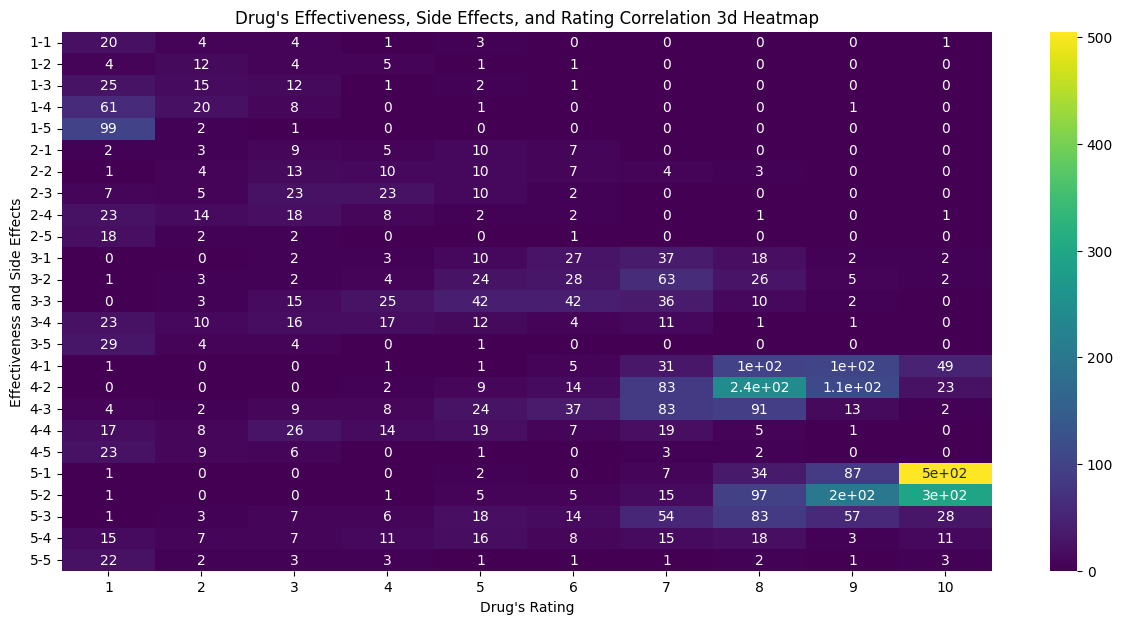

In [47]:
# Cross-tabulate the data
heatmap_data = pd.crosstab(index=[df_druglib['effectiveness_rank'], df_druglib['sideEffects_rank']], columns=df_druglib['rating'])

# Plot heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar=True)

plt.xlabel("Drug's Rating")
plt.ylabel('Effectiveness and Side Effects')
plt.title("Drug's Effectiveness, Side Effects, and Rating Correlation 3d Heatmap")

plt.show()

In [48]:
import nltk
import ssl

# Disable SSL verification (not recommended for production)
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Now download the required NLTK data
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
from nltk.corpus import stopwords  # Add this import
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))  # Now this will work

def split_text(text):
    return text.split(' ')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def split_text(text):
    return text.split(' ')

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords and stem
    return ' '.join(words)

df_druglib['cleaned_reviews'] = df_druglib['commentsReview'].apply(preprocess_text)
df_druglib['cleaned_benefits'] = df_druglib['benefitsReview'].apply(preprocess_text)
df_druglib['cleaned_sideEffects'] = df_druglib['sideEffectsReview'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def sentiment_analyzer(df,text_column):
    # Initialize VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Define a function to apply sentiment analysis while handling NaN values
    def apply_sentiment_analysis(x):
        if isinstance(x, str):  # Check if x is a string
            return sid.polarity_scores(x)['compound']
        else:
            return float('nan')  # Return NaN for non-string values

    # Define threshold values for sentiment classification
    positive_threshold = 0.4
    negative_threshold = -0.4

    # Apply VADER sentiment analyzer
    df['sentiment_score'] = df[text_column].apply(apply_sentiment_analysis)

    # Apply sentiment labeling using lambda functions
    df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > positive_threshold else ('Negative' if x < negative_threshold else 'Neutral'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
sentiment_analyzer(df_druglib,'cleaned_reviews')

In [53]:
import plotly.express as px

In [54]:
import plotly.express as px
import pandas as pd

# Ensure df_druglib exists before running the code
if 'sentiment_label' not in df_druglib.columns or 'sentiment_score' not in df_druglib.columns:
    raise ValueError("Error: df_druglib must have 'sentiment_label' and 'sentiment_score' columns!")

# Aggregate sentiment data
df_sentiment = df_druglib.groupby('sentiment_label').agg(
    count=('sentiment_score', 'count'),
    avg_value=('sentiment_score', 'mean')
)

# Rename columns for better readability
df_sentiment.rename(columns={'count': 'Total Reviews', 'avg_value': 'Avg. Sentiment Score'}, inplace=True)
df_sentiment.index.names = ['Sentiment Label']

# Debugging step: Check if df_sentiment is not empty
if df_sentiment.empty:
    raise ValueError("Error: df_sentiment is empty. Check df_druglib for missing data!")

# Define colors for each sentiment label
colors = {
    'Positive': '#00CC96',
    'Neutral': '#636EFA',
    'Negative': '#EF553B'
}

# Create a pie chart using Plotly Express
fig = px.pie(
    df_sentiment.reset_index(),  # Reset index to ensure 'Sentiment Label' is a column
    names='Sentiment Label',
    values='Total Reviews',
    color='Sentiment Label',
    width=600,
    height=600,
    color_discrete_map=colors
)

# Improve pie chart appearance
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent'
)

# Set layout properties
fig.update_layout(
    title_text='Comments Review Section Sentiment Analysis',
    title_x=0.5,
    title_font_size=20
)

# Show the figure
fig.show()


In [55]:
keyword = 'depression'

filtered_df = df_druglib[df_druglib['condition'].str.contains(keyword)]

top5drugs = filtered_df.groupby('urlDrugName').agg(
    effectiveness=('effectiveness_rank', np.mean),
    sideEffects=('sideEffects_rank', np.mean),
    reviews=('commentsReview', 'count'),
    popularity=('rating', np.sum)
).sort_values(by='popularity', ascending=False).head(5)

top5drugs

/var/folders/7t/gd3v4bcx0p3__qld0yj8_2rh0000gn/T/ipykernel_41634/2205516445.py:5: FutureWarning:

The provided callable <function mean at 0x10ada9300> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/var/folders/7t/gd3v4bcx0p3__qld0yj8_2rh0000gn/T/ipykernel_41634/2205516445.py:5: FutureWarning:

The provided callable <function mean at 0x10ada9300> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/var/folders/7t/gd3v4bcx0p3__qld0yj8_2rh0000gn/T/ipykernel_41634/2205516445.py:5: FutureWarning:

The provided callable <function sum at 0x10ad7fec0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,effectiveness,sideEffects,reviews,popularity
urlDrugName,,,,
lexapro,3.661017,2.406780,59,403
prozac,4.157895,2.315789,38,288
wellbutrin,3.702703,2.243243,37,269
zoloft,3.971429,2.057143,35,257
effexor,3.631579,2.842105,38,248


In [56]:
df_druglib.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_rank,sideEffects_rank,cleaned_reviews,cleaned_benefits,cleaned_sideEffects,sentiment_score,sentiment_label
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",5,2,monitor blood pressure weight asses resolution...,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,-0.2960,Neutral
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",5,4,hate birth control would suggest anyone,although type birth control cons pros help cra...,heavy cycle cramps hot flashes fatigue long la...,-0.5719,Negative
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,5,1,took pills onset menstrual cramps every hours ...,used cramps badly would leave balled bed least...,heavier bleeding clotting normal,-0.5106,Negative
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,2,2,given prilosec prescription dose mg per day me...,acid reflux went away months days drug heartbu...,constipation dry mouth mild dizziness would go...,0.0000,Neutral
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,2,4,see,think lyrica starting help pain side effects s...,felt extremely drugged dopey could drive med a...,0.0000,Neutral


In [57]:
df_sentiment = df_drug.groupby('sentiment_label').agg(
    count=('sentiment_score', 'count'),
    avg_value=('sentiment_score', 'mean')
)

df_sentiment.rename(columns={'count': 'Total Reviews', 'avg_value': 'Avg. Sentiment Score'}, inplace=True)
df_sentiment.index.names = ['Sentiment Label']

# Define colors for each sentiment label
colors = {
    'Positive': '#00CC96',
    'Neutral': '#636EFA',
    'Negative': '#EF553B'
}

# Create a pie chart using Plotly Express
fig = px.pie(
    df_sentiment.reset_index(),
    names='Sentiment Label',
    values='Total Reviews',
    color='Sentiment Label',
    width=600,
    height=600,
    color_discrete_map=colors
)

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent'
)
fig.update_layout(
    title_text=f'{drug.capitalize()} Sentiment Analysis',
    title_x=0.5,
    title_font_size=30)

NameError: name 'df_drug' is not defined

In [ ]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/c4/b7/2e35f8e289ab70108f8cbb2e7a2208f0575dc704749721286519dcf35f6f/scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/c4/5e/b1b0124be8e76f87115f16b8915003eec4b7060298117715baf13f51942c/scipy-1.15.1-cp312-cp312-macosx_14_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.3 MB/s eta 0:00:00
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 36.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 35.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update

In [ ]:
from nltk import pos_tag

In [ ]:
import nltk

# Download the required POS tagging model
nltk.download('averaged_perceptron_tagger')

# Also download 'punkt' for word tokenization
nltk.download('punkt')




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hamzanadeemsiddiqui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
drug = 'lexapro'
df_drug = df_druglib[df_druglib['urlDrugName'].str.contains(drug)]

In [ ]:
conditions=df_druglib['condition'].unique()
print(len(conditions),' different conditions')
print('sample:')
for condition in conditions[:10]:
    print(condition)

1754  different conditions
sample:
management of congestive heart failure
birth prevention
menstrual cramps
acid reflux
fibromyalgia
hair loss
add
depression
panic disorder
allergies


In [ ]:
keyword = 'acne'

filtered_df = df_druglib[df_druglib['condition'].str.contains(keyword)]

filtered_df.groupby('urlDrugName').agg(
    effectiveness=('effectiveness_rank', np.mean),
    sideEffects=('sideEffects_rank', np.mean),
    reviews=('commentsReview', 'count'),
    popularity=('rating', np.sum)
).sort_values(by='reviews', ascending=False).head(10)

/var/folders/7t/gd3v4bcx0p3__qld0yj8_2rh0000gn/T/ipykernel_38377/883454326.py:5: FutureWarning:

The provided callable <function mean at 0x104679ee0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/var/folders/7t/gd3v4bcx0p3__qld0yj8_2rh0000gn/T/ipykernel_38377/883454326.py:5: FutureWarning:

The provided callable <function mean at 0x104679ee0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/var/folders/7t/gd3v4bcx0p3__qld0yj8_2rh0000gn/T/ipykernel_38377/883454326.py:5: FutureWarning:

The provided callable <function sum at 0x104678ae0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,effectiveness,sideEffects,reviews,popularity
urlDrugName,,,,
accutane,4.511628,2.860465,43,333
differin,3.419355,2.064516,31,215
retin-a,3.966667,2.333333,30,231
retin-a-micro,3.750000,2.500000,20,146
minocycline,3.222222,2.333333,18,101
doxycycline,3.928571,2.785714,14,94
tazorac,4.000000,2.615385,13,98
spironolactone,4.333333,2.333333,12,98
renova,3.727273,2.272727,11,88


In [ ]:
drug = 'accutane'
df_drug = df_druglib[df_druglib['urlDrugName'].str.contains(drug)]

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

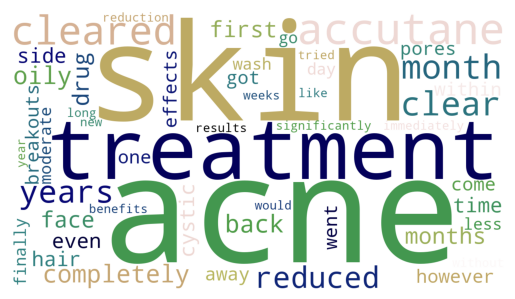

In [ ]:
benefits = ' '.join(benefit for benefit in df_drug['cleaned_benefits'])
words = word_tokenize(benefits)
word_list = Counter([word for word in words]).most_common(50)

wc = WordCloud(
    width=1280,
    height=720,
    background_color='white',
    colormap='gist_earth'
    ).generate_from_frequencies(dict(word_list))

plt.imshow(wc)

plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

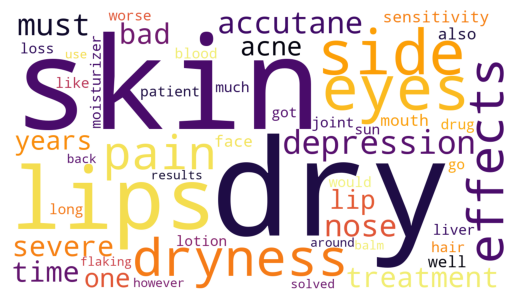

In [ ]:
side_effects = ' '.join(side_effect for side_effect in df_drug['cleaned_sideEffects'])
words = word_tokenize(side_effects)
word_list = Counter([word for word in words]).most_common(50)

wc = WordCloud(
    width=1280,
    height=720,
    background_color='white',
    colormap='inferno'
    ).generate_from_frequencies(dict(word_list))

plt.imshow(wc)

plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
df_drugcom_train=pd.read_csv('.venv/drugsComTrain_raw.csv')
df_drugcom_test=pd.read_csv('.venv/drugsComTest_raw.csv')

In [ ]:
df_drugcom_train.head()
df_drugcom_train.shape

(161297, 7)

In [ ]:
df_drugcom_test.head()
df_drugcom_test.shape

(53766, 7)

In [ ]:
df_com=pd.concat([df_drugcom_test,df_drugcom_train])
df_com

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [ ]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [ ]:
df_com.isnull().sum()

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
df_Com=df_com.dropna()
df_Com.shape

(213869, 7)

In [ ]:
df_Com.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [59]:
df_Com['cleaned_review']=df_Com['review'].apply(preprocess_text)

/var/folders/7t/gd3v4bcx0p3__qld0yj8_2rh0000gn/T/ipykernel_41634/2163683622.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
sentiment_analyzer(df_Com,'cleaned_review')

/var/folders/7t/gd3v4bcx0p3__qld0yj8_2rh0000gn/T/ipykernel_41634/1805201346.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7t/gd3v4bcx0p3__qld0yj8_2rh0000gn/T/ipykernel_41634/1805201346.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df_sentiment = df_Com.groupby('sentiment_label').agg(
    count=('sentiment_score', 'count'),
    avg_value=('sentiment_score', 'mean')
)

df_sentiment.rename(columns={'count': 'Total Reviews', 'avg_value': 'Avg. Sentiment Score'}, inplace=True)
df_sentiment.index.names = ['Sentiment Label']

# Define colors for each sentiment label
colors = {
    'Positive': '#00CC96',
    'Neutral': '#636EFA',
    'Negative': '#EF553B'
}

# Create a pie chart using Plotly Express
fig = px.pie(
    df_sentiment.reset_index(),
    names='Sentiment Label',
    values='Total Reviews',
    color='Sentiment Label',
    width=600,
    height=600,
    color_discrete_map=colors
)

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent'
)
fig.update_layout(
    title_text='Review Section Sentiment Analysis',
    title_x=0.5,
    title_font_size=20)

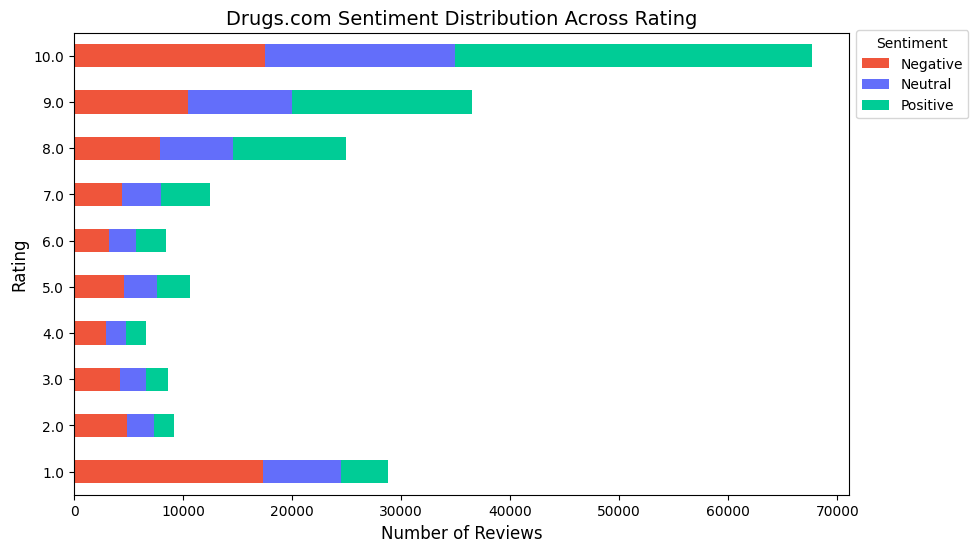

In [63]:
# Plotting horizontal bar chart
sentiment_order = [
    'Negative',
    'Neutral',
    'Positive'
]

sentiment_color = sns.color_palette("Reds", len(sentiment_order))
data_bar2 = df_Com.pivot_table(index='rating',columns='sentiment_label',values='review',aggfunc='count')
data_bar2.sort_index()

ax = data_bar2.plot(kind='barh',stacked=True,color=['#EF553B','#636EFA','#00CC96'],figsize=(10, 6))

plt.title('Drugs.com Sentiment Distribution Across Rating', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=12)

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Sentiment', bbox_to_anchor=(1,1.02), loc='upper left')

plt.show()

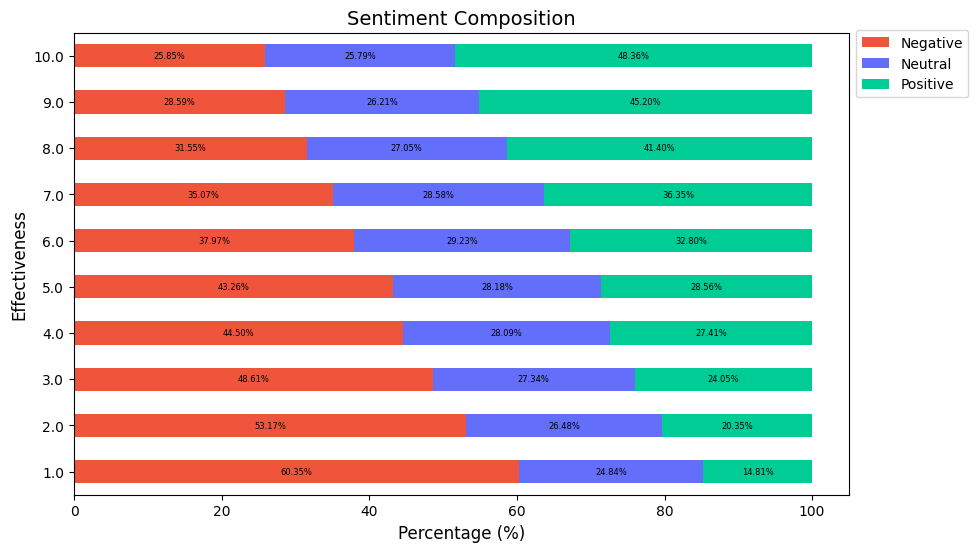

In [64]:
# Calculate row-wise sum for normalization
row_sums = data_bar2.sum(axis=1)

# Calculate percentages
data_percent = data_bar2.div(row_sums, axis=0) * 100

# Plotting
ax = data_percent.plot.barh(stacked=True,color=['#EF553B','#636EFA','#00CC96'],figsize=(10, 6))
plt.title('Sentiment Composition', fontsize=14)
plt.ylabel('Effectiveness', fontsize=12)
plt.xlabel('Percentage (%)', fontsize=12)

for c in ax.containers:

    # customize the label to account for cases when there might not be a bar section
    labels = [f'{w:.2f}%' if (w := v.get_width()) > 0 else '' for v in c ]

    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center', fontsize=6)

ax.legend(bbox_to_anchor=(1,1.02), loc='upper left')

plt.show()

In [65]:
data_bar2

sentiment_label,Negative,Neutral,Positive
rating,,,
1.0,17363,7146,4260
2.0,4893,2437,1873
3.0,4211,2368,2083
4.0,2947,1860,1815
5.0,4607,3001,3042
6.0,3191,2456,2756
7.0,4373,3564,4533
8.0,7858,6738,10313
9.0,10435,9567,16497


In [66]:
data_percent

sentiment_label,Negative,Neutral,Positive
rating,,,
1.0,60.353158,24.839237,14.807605
2.0,53.167445,26.480495,20.352059
3.0,48.614639,27.337797,24.047564
4.0,44.503171,28.088191,27.408638
5.0,43.258216,28.178404,28.563380
6.0,37.974533,29.227657,32.797810
7.0,35.068164,28.580593,36.351243
8.0,31.546830,27.050464,41.402706
9.0,28.589824,26.211677,45.198499


In [68]:
most_reviewed_med_condition = df_Com.groupby('condition').agg(
    reviews=('review', 'count')
).sort_values(by='reviews', ascending=False).head(10)

conditions = df_Com['condition'].unique()

print(len(conditions),' different conditions')
print('sample:')

for index, row in most_reviewed_med_condition.iterrows():
    print(f"{index}: {row['reviews']} reviews")

916  different conditions
sample:
Birth Control: 38436 reviews
Depression: 12164 reviews
Pain: 8245 reviews
Anxiety: 7812 reviews
Acne: 7435 reviews
Bipolar Disorde: 5604 reviews
Insomnia: 4904 reviews
Weight Loss: 4857 reviews
Obesity: 4757 reviews
ADHD: 4509 reviews
